In [1]:
conda install statsmodels

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\na990\anaconda3\envs\learning

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-0.5.3                |  py310haa95532_0         290 KB
    statsmodels-0.14.0         |  py310h9128911_0         9.9 MB
    ------------------------------------------------------------
                                           Total:        10.2 MB

The following NEW packages will be INSTALLED:

  patsy              pkgs/main/win-64::patsy-0.5.3-py310haa95532_0 
  statsmodels        pkgs/main/win-64::statsmodels-0.14.0-py310h9128911_0 




statsmodels-0.14.0   | 9.9 MB    |            |   0% 

patsy-0.5.3          | 290 KB    |            |   0% 

patsy-0.5.3          | 290 KB    | 5          |   6% 
statsmodels-0.14.0   | 9.9 M



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels


statsmodels.__version__

'0.14.0'

In [6]:
import seaborn as sns

iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model=smf.ols(formula='sepal_length~sepal_width',data=iris).fit()
model.summary()
# 상관계수 R제곱의 값을 봄
#coef는 기울기 -0.2234, 상관계수는 6.5262 y=-0.2234X+6.5262
#p값이 0.05미만이면 귀무가설을 기각 -> 독립변수들이 종속변수에 영향을 준다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.152
Time:                        11:20:34   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5262      0.479     13.628      0.000       5.580       7.473
sepal_width    -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
intercept=model.params.Intercept
slope=model.params.sepal_width

print(intercept,slope)

6.526222550894483 -0.2233610611298997


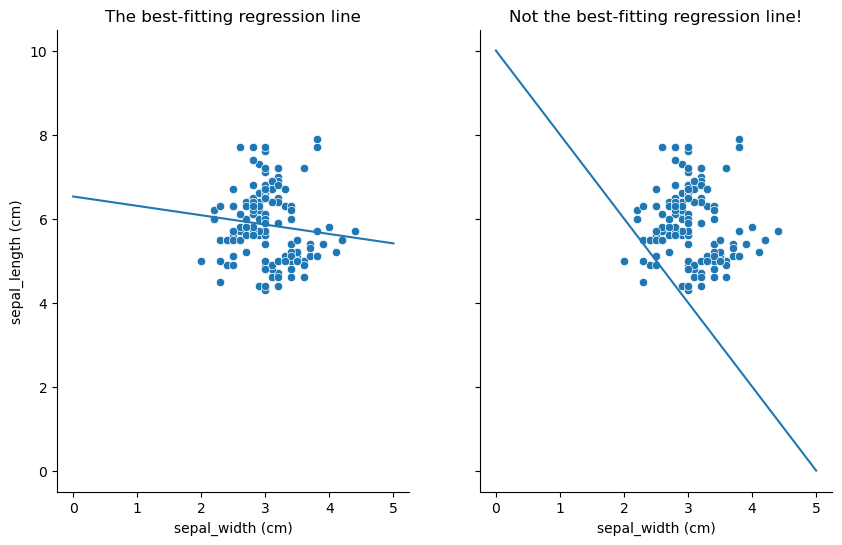

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.show()

In [26]:
!pip install pingouin

     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/198.6 kB ? eta -:--:--
     --------------- --------------------- 81.9/198.6 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 198.6/198.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.3 MB 13.5 MB/s eta 0:00:01
   --- ------------------------------------ 0.8/9.3 MB 13.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/9.3 MB 11.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/9.3 MB 11.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.3 MB 12.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.3 MB 11.5 MB/s

In [27]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [28]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


In [29]:
iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length']].rcorr()

C:\Users\na990\anaconda3\envs\learning\lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [30]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


In [31]:
mod4 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod4.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


### tips 데이터를 활용해서 회귀분석
- 종속변수 tip
- 독립변수 자유

In [34]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [50]:
model=smf.ols(formula='tip ~ total_bill',data=tips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           6.69e-34
Time:                        15:47:06   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
mod1 = pg.linear_regression(tips['tip'], tips['total_bill'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.75,1.01,6.71,0.0,0.46,0.45,4.77,8.73
1,tip,4.35,0.30,14.26,0.0,0.46,0.45,3.75,4.95
